In [2]:
import mysql.connector as mysql
import pandas as pd
import folium
import requests
import googlemaps
from geopy.distance import geodesic
import numpy as np
from tqdm import tqdm
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from matplotlib import font_manager
from matplotlib import rc

#database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com


In [3]:
remote = mysql.connect (
    host = "database-1.c9ks828mszs7.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "roschool",
    password = "1234",
    database = "roschool"
)

In [5]:
cursor = remote.cursor(buffered=True)

#규모별 경력 학력
sql_1 = """
   SELECT 
    ct.type AS 기업규모,
    ed.education AS 학력,
    COUNT(*) AS 선호도
FROM 
    recruit_info re
JOIN 
    company_info co ON re.comp_name_id = co.comp_id
JOIN 
    comp_type ct ON co.comp_type_id = ct.comp_type_id
JOIN 
    education_info ed ON re.education_id = ed.education_id
WHERE 
    ct.type != "정보없음" 
    AND ct.type != "기타" 
    AND ct.type NOT LIKE "%코스%"
    AND ed.education != "정보없음"
GROUP BY 
    ct.type, ed.education
ORDER BY 
    ct.type, 선호도 DESC;

"""

cursor.execute(sql_1)

result = cursor.fetchall()

df = pd.DataFrame(result)



df

,0,1,2
0,강소기업,대졸이상,7
1,강소기업,초대졸이상,5
2,강소기업,학력무관,4
3,대기업,대졸이상,2
4,대기업,학력무관,1
5,벤처기업,대졸이상,21
6,벤처기업,학력무관,9
7,벤처기업,초대졸이상,4
8,벤처기업,석사이상,4
9,벤처기업,박사이상,1


In [6]:
df.columns = ["기업규모", "학력", "수"]

df

,기업규모,학력,수
0,강소기업,대졸이상,7
1,강소기업,초대졸이상,5
2,강소기업,학력무관,4
3,대기업,대졸이상,2
4,대기업,학력무관,1
5,벤처기업,대졸이상,21
6,벤처기업,학력무관,9
7,벤처기업,초대졸이상,4
8,벤처기업,석사이상,4
9,벤처기업,박사이상,1


In [7]:
# 기업규모 정렬 순서 설정
order = ["스타트업", "벤처기업", "강소기업", "중소기업", "중견기업", "대기업"]
df["기업규모"] = pd.Categorical(df["기업규모"], categories=order, ordered=True)

# DataFrame 
df = df.sort_values(by=["기업규모", "학력"]).reset_index(drop=True)

df

,기업규모,학력,수
0,스타트업,대졸이상,4
1,스타트업,석사이상,1
2,스타트업,초대졸이상,8
3,벤처기업,대졸이상,21
4,벤처기업,박사이상,1
5,벤처기업,석사이상,4
6,벤처기업,초대졸이상,4
7,벤처기업,학력무관,9
8,강소기업,대졸이상,7
9,강소기업,초대졸이상,5


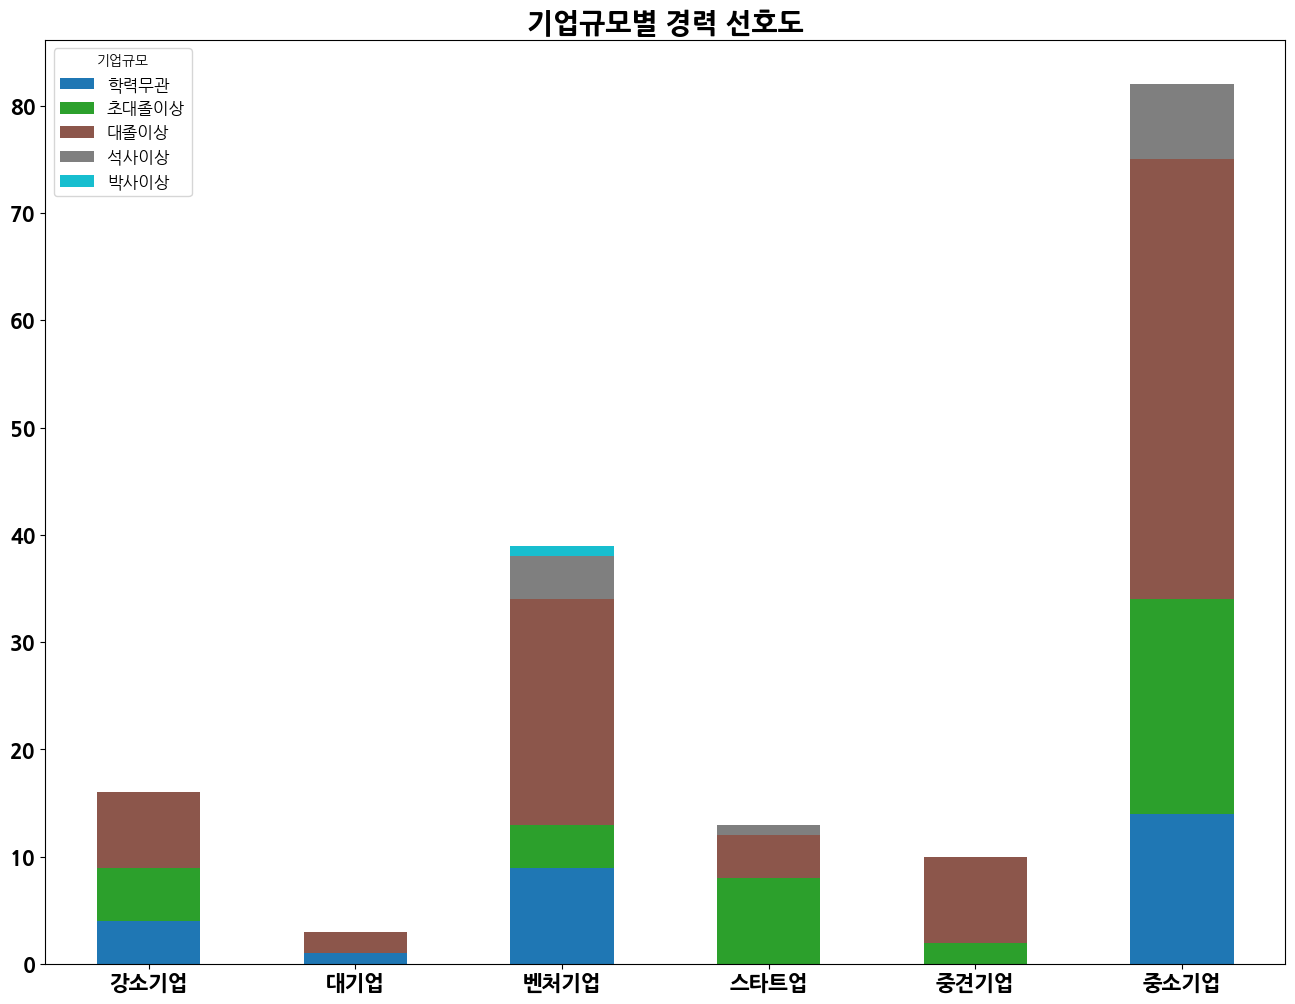

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager

# 한글 폰트 설정 (Linux: NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

# 데이터 Pivot (기업규모별로 그룹화)
pivot_df = df.pivot(index="기업규모", columns="학력", values="수").fillna(0)

# 막대 그래프 그리기 (Stacked)
pivot_df.plot(kind="bar", stacked=True, figsize=(16, 12), colormap="tab10")

# 그래프 설정
plt.xticks(fontsize=15, fontweight="bold", rotation=0)
plt.yticks(fontsize=15, fontweight="bold")
plt.title("기업규모별 경력 선호도", fontsize=20, fontweight="bold")
plt.xlabel("")  # x축 라벨 제거
plt.legend(title="기업규모", fontsize=12)

# 그래프 표시
plt.show()



/tmp/ipykernel_5078/1933749065.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(["기업규모", "학력"])["수"].sum().unstack().fillna(0)


ValueError: Invalid RGBA argument: '대졸이상'

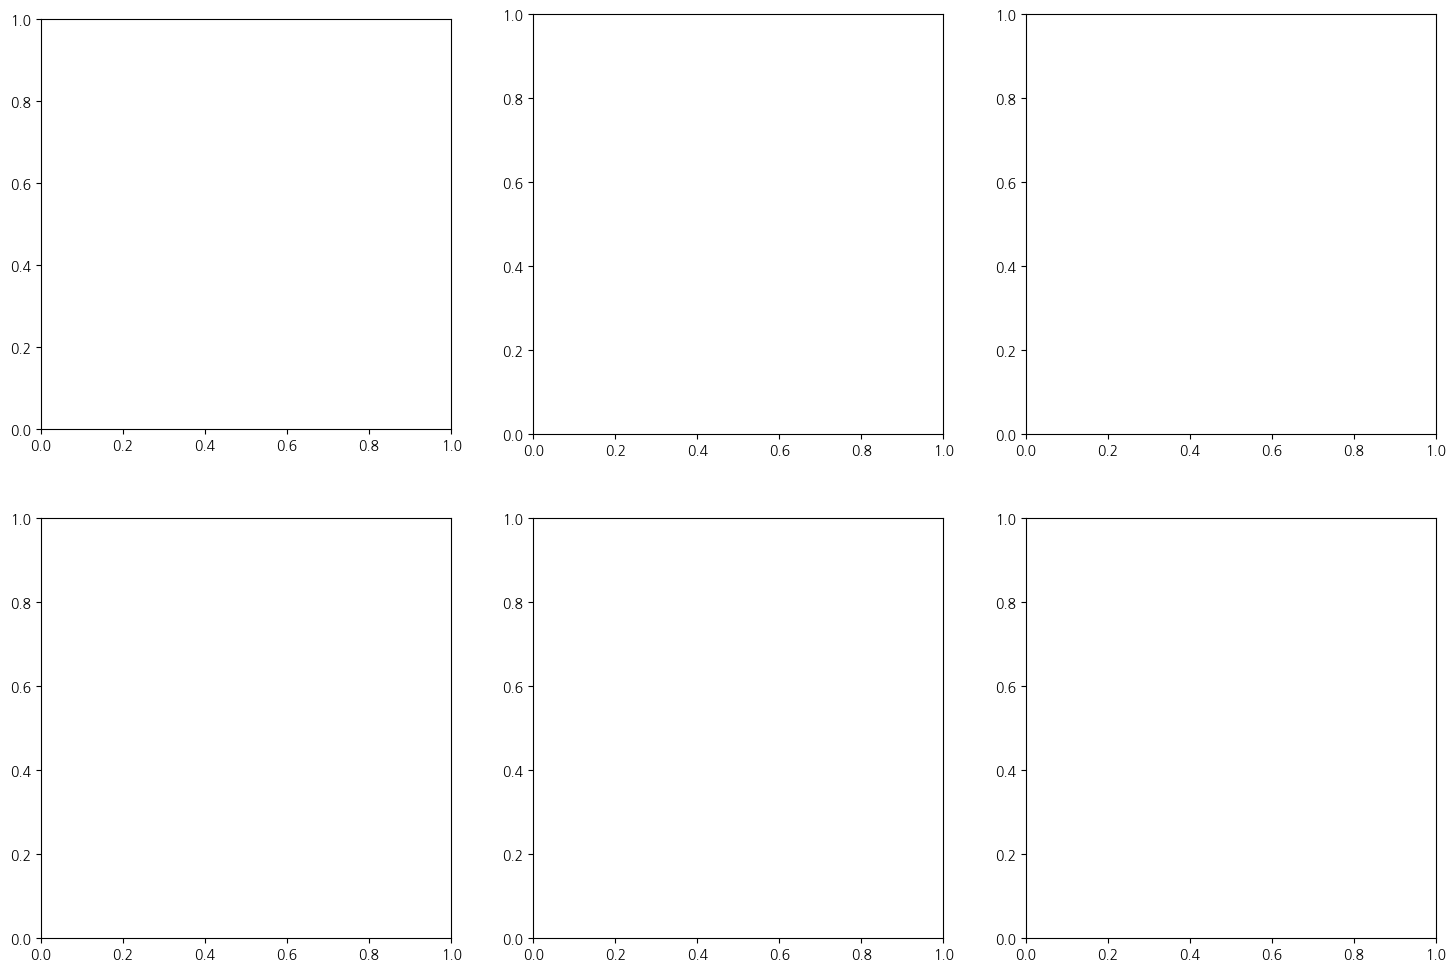

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager

# 한글 폰트 설정 (Linux: NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

# 기업규모별 데이터 준비
grouped_data = df.groupby(["기업규모", "학력"])["수"].sum().unstack().fillna(0)

# 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2행 3열 서브플롯
axes = axes.flatten()  # 축 배열을 1차원으로 변환

# 색상 설정
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#2E7B26'][:len(df)]

# colors = {
#     "대졸이상": "#ff9999",  # 빨간색
#     "초대졸이상": "#ffc000",  # 노란색
#     "석사이상": "#8fd9b6",  # 초록색
#     "박사이상": "#d395d0",  # 보라색
#     "학력무관": "#2E7B26"  # 진한 초록색
# }

# 각 기업규모별 파이 차트 생성
for i, (company, data) in enumerate(grouped_data.iterrows()):
    # 0% 항목 제거
    data = data[data > 0]

    # explode 설정 (항목별로 분리)
    explode = [0.05] * len(data)

    # 파이 차트 생성
    wedges, texts, autotexts = axes[i].pie(
        data,
        labels=data.index,
        autopct=lambda p: f"{p:.1f}%" if p > 0 else "",  # 0% 숨김
        startangle=140,
        colors=colors,
        explode=explode,
        textprops={"fontsize": 16, "color": "black", "fontweight": "bold"}  # 항목 텍스트: 검은색, 굵게
    )

    # 퍼센트 텍스트 색상 변경 (autotexts 설정)
    for autotext in autotexts:
        autotext.set_color("white")  # 퍼센트 텍스트: 흰색
        autotext.set_fontsize(14)
        autotext.set_fontweight("bold")

    # 차트 제목 설정
    axes[i].set_title(f"{company}", fontsize=20, fontweight="bold")

# 전체 제목 설정
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 확보
plt.show()


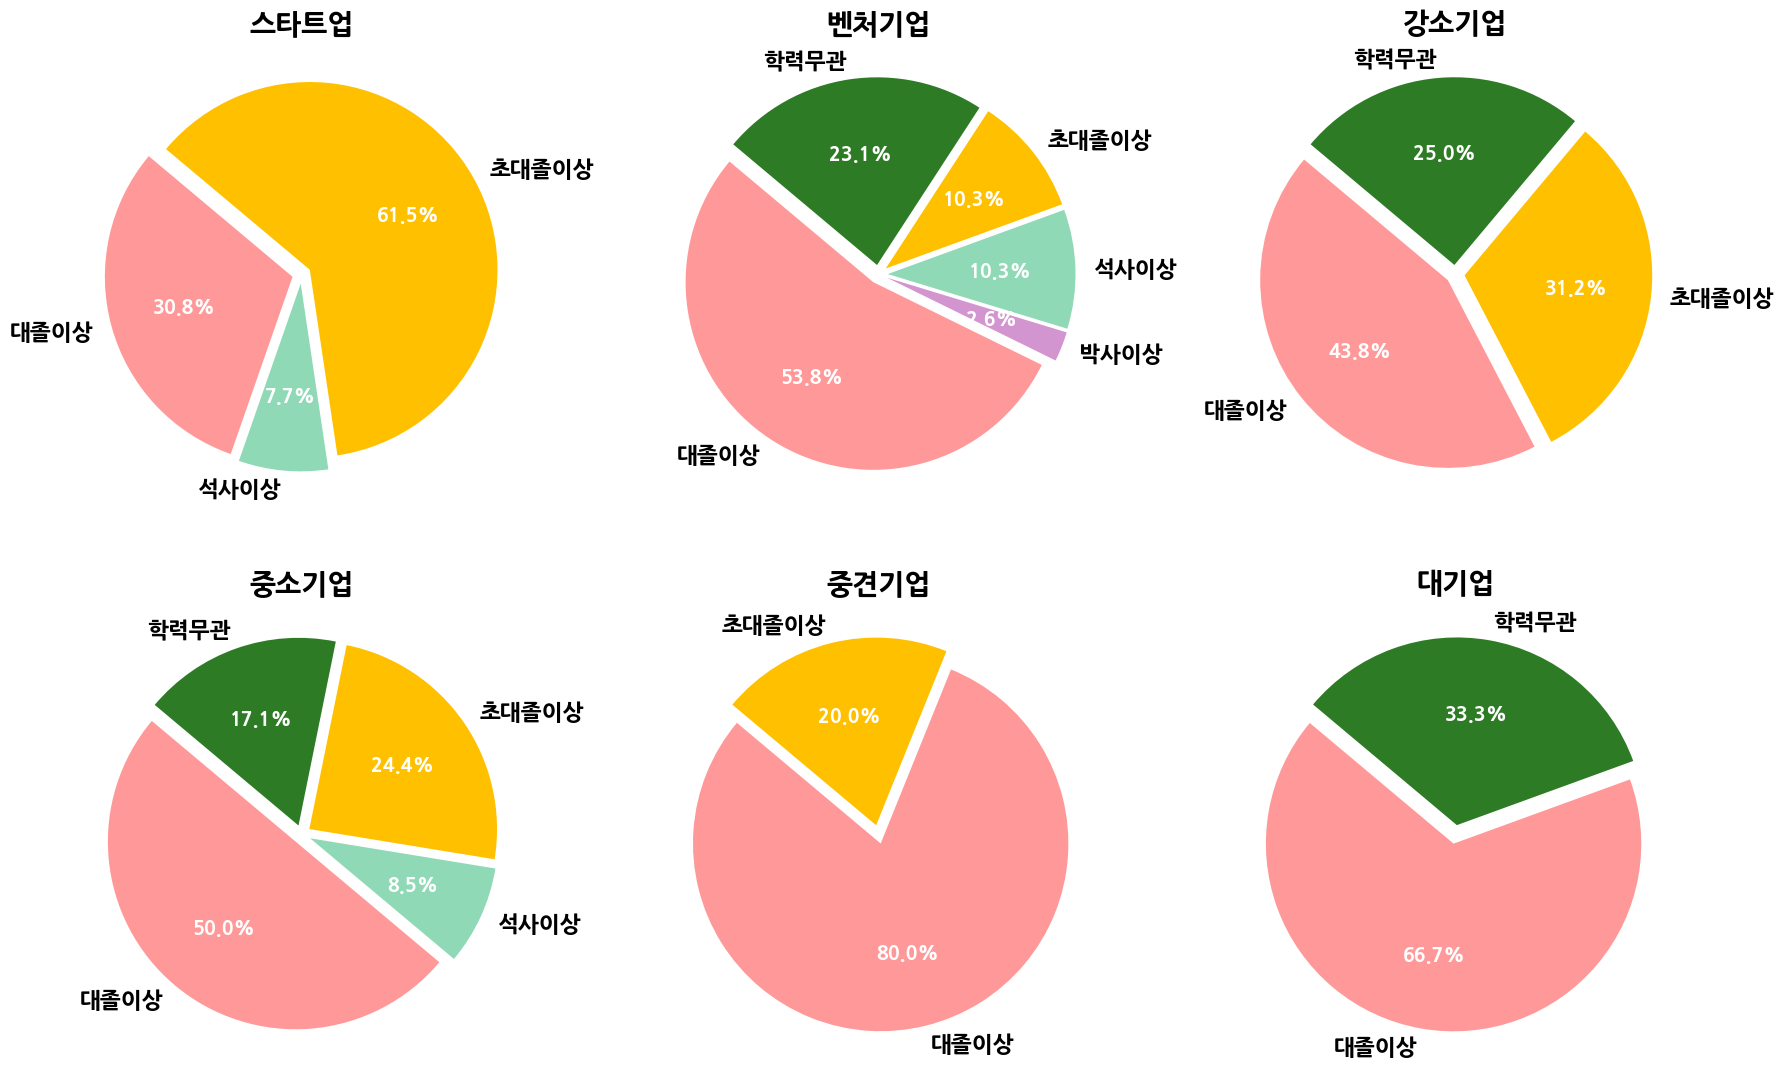

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import font_manager

# 한글 폰트 설정 (Linux: NanumGothic)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
font = font_manager.FontProperties(fname=font_path)
rc('font', family=font.get_name())

# 데이터 예시
# grouped_data = pd.DataFrame({...}) # 실제 데이터를 여기에 삽입하세요.

# 색상 매핑 딕셔너리
colors_dict = {
    "대졸이상": "#ff9999",  # 빨간색
    "초대졸이상": "#ffc000",  # 노란색
    "석사이상": "#8fd9b6",  # 초록색
    "박사이상": "#d395d0",  # 보라색
    "학력무관": "#2E7B26"  # 진한 초록색
}

# 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # 2행 3열 서브플롯
axes = axes.flatten()  # 축 배열을 1차원으로 변환

# 각 기업규모별 파이 차트 생성
for i, (company, data) in enumerate(grouped_data.iterrows()):
    # 0% 항목 제거
    data = data[data > 0]

    # 데이터에 맞는 색상 리스트 생성
    data_colors = [colors_dict[label] for label in data.index]

    # explode 설정 (항목별로 분리)
    explode = [0.05] * len(data)

    # 파이 차트 생성
    wedges, texts, autotexts = axes[i].pie(
        data,
        labels=data.index,
        autopct=lambda p: f"{p:.1f}%" if p > 0 else "",  # 0% 숨김
        startangle=140,
        colors=data_colors,  # 색상 매핑
        explode=explode,
        textprops={"fontsize": 16, "color": "black", "fontweight": "bold"}  # 항목 텍스트: 검은색, 굵게
    )

    # 퍼센트 텍스트 색상 변경 (autotexts 설정)
    for autotext in autotexts:
        autotext.set_color("white")  # 퍼센트 텍스트: 흰색
        autotext.set_fontsize(14)
        autotext.set_fontweight("bold")

    # 차트 제목 설정
    axes[i].set_title(f"{company}", fontsize=20, fontweight="bold")

# 전체 제목 설정
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 확보
plt.show()


In [30]:
remote.close()